### Installs & Imports

In [2]:
import os
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd
import spacy
import emoji


# 1. Named Entity Recognition & Classification

### Training & Validation Sets

#### Distribution Analysis

In [2]:
label_mapping = {
    0: 'O', 1: 'B-CARDINAL', 2: 'B-DATE', 3: 'I-DATE', 4: 'B-PERSON', 5: 'I-PERSON',
    6: 'B-NORP', 7: 'B-GPE', 8: 'I-GPE', 9: 'B-LAW', 10: 'I-LAW', 11: 'B-ORG',
    12: 'I-ORG', 13: 'B-PERCENT', 14: 'I-PERCENT', 15: 'B-ORDINAL', 16: 'B-MONEY',
    17: 'I-MONEY', 18: 'B-WORK_OF_ART', 19: 'I-WORK_OF_ART', 20: 'B-FAC',
    21: 'B-TIME', 22: 'I-CARDINAL', 23: 'B-LOC', 24: 'B-QUANTITY', 25: 'I-QUANTITY',
    26: 'I-NORP', 27: 'I-LOC', 28: 'B-PRODUCT', 29: 'I-TIME', 30: 'B-EVENT',
    31: 'I-EVENT', 32: 'I-FAC', 33: 'B-LANGUAGE', 34: 'I-PRODUCT', 35: 'I-ORDINAL',
    36: 'I-LANGUAGE'
}

In [3]:
# Training data (merge 5 files together - we use the original four training files and valiadation as training data)
# # a new file called 'merged_word_train_val' is created as a result of the merging and conversion of
# sentence instances to word instances and is saved in the folder
train_val_files = ["Training Data/NERC Data/Original/train00.json", "Training Data/NERC Data/Original/train01.json", "Training Data/NERC Data/Original/train02.json",
                    "Training Data/NERC Data/Original/train03.json", "Training Data/NERC Data/Original/valid.json"]

output_file = "Training Data/NERC Data/merged_word_train_val.json"

word_instances = []
sentence_id = 0

for file in train_val_files:
    with open(file, "r", encoding="utf-8") as in_file:
        for line in in_file:
            sentence = json.loads(line)
            tokens = sentence["tokens"]
            ner_tags = sentence["tags"]

            for token_id, (token, ner_tag) in enumerate(zip(tokens, ner_tags)):
                word_instance = {
                    "sentence_id": sentence_id,
                    "token_id": token_id,
                    "token": token,
                    "BIO_NER_tag": label_mapping.get(ner_tag, "O")  # Map numeric tag to IOB format
                }
                word_instances.append(word_instance)
        
            # Increment the sentence ID
            sentence_id += 1  

# Save the transformed data to a new JSON file
with open(output_file, "w", encoding="utf-8") as out_file:
    for instance in word_instances:
        out_file.write(json.dumps(instance) + "\n")

In [4]:
# Validation data (we use the original test data as validation data)
# a new file called 'merged_word_test' is created as a result of the merging and conversion of
# sentence instances to word instances and is saved in the folder
test_file = "Training Data/NERC Data/Original/test.json"
output_file = "Training Data/NERC Data/word_test.json"

word_instances = []
sentence_id = 0

with open(test_file, "r", encoding="utf-8") as in_file:
    for line in in_file:
            sentence = json.loads(line)
            tokens = sentence["tokens"]
            ner_tags = sentence["tags"]

            # Convert sentence instances to word instances 
            for token_id, (token, ner_tag) in enumerate(zip(tokens, ner_tags)):
                word_instance = {
                    "sentence_id": sentence_id,
                    "token_id": token_id,
                    "token": token,
                    "BIO_NER_tag": label_mapping.get(ner_tag, "O")  # Map numeric tag to IOB format
                }
                word_instances.append(word_instance)
        
            # Increment the sentence ID
            sentence_id += 1  

# Save the transformed data to a new JSON file
with open(output_file, "w", encoding="utf-8") as out_file:
    for instance in word_instances:
        out_file.write(json.dumps(instance) + "\n")


In [5]:
def ner_distribution_table(file_path):
    """
    Creates a dataframe showing the count and percentage of each NER tag
    in the given dataset.
    """
    tags_list = []

    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)  
            tags_list.append(data['BIO_NER_tag'])  

    # Count occurrences of each tag
    tag_counts = Counter(tags_list)

    # Convert counts to percentages
    total_tags = sum(tag_counts.values())
    tag_data = []
    for tag, count in tag_counts.items():
        tag_percentage = (count / total_tags) * 100
        tag_info = {"NER Label": tag, "Count": count, "Percentage": tag_percentage}
        tag_data.append(tag_info)
    
    # Create and return DataFrame
    df = pd.DataFrame(tag_data).sort_values(by="Percentage", ascending=False)
    df.reset_index(drop=True, inplace=True)
    df = df.set_index(keys="NER Label") 
  
    return df

In [6]:
ner_distribution_table("Training Data/NERC Data/merged_word_train_val.json")


,Count,Percentage
NER Label,,
O,1066810,86.300317
I-ORG,20582,1.664995
B-GPE,17673,1.429669
B-PERSON,17449,1.411549
I-DATE,15142,1.224922
B-ORG,14560,1.177841
I-PERSON,12542,1.014594
B-DATE,12429,1.005452
B-CARDINAL,8292,0.670787


In [7]:
ner_distribution_table("Training Data/NERC Data/word_test.json")

,Count,Percentage
NER Label,,
O,131814,86.309200
I-ORG,2406,1.575401
B-GPE,2240,1.466708
I-DATE,2011,1.316763
B-PERSON,1988,1.301703
B-ORG,1795,1.175331
B-DATE,1602,1.048958
I-PERSON,1412,0.924550
B-CARDINAL,935,0.612220


### Test Set

In [8]:
# Distribution of provided Test set (from .tsv file)
file_path = 'Test Data/NER-test.tsv'
df = pd.read_csv(file_path, delimiter='\t')

# Count occurrences of each tag
tag_counts = Counter(df['BIO_NER_tag'])

# Convert counts to percentages
total_tags = sum(tag_counts.values())
tag_data = []
for tag, count in tag_counts.items():
    tag_percentage = (count / total_tags) * 100
    tag_info = {"NER Label": tag, "Count": count, "Percentage": tag_percentage}
    tag_data.append(tag_info)

# Create and return DataFrame
distribution_df = pd.DataFrame(tag_data).sort_values(by="Percentage", ascending=False)
distribution_df.reset_index(drop=True, inplace=True)
distribution_df = distribution_df.set_index(keys="NER Label") 
display(distribution_df)

,Count,Percentage
NER Label,,
O,186,78.481013
B-PERSON,11,4.641350
I-WORK_OF_ART,10,4.219409
B-WORK_OF_ART,9,3.797468
I-PERSON,8,3.375527
B-LOC,7,2.953586
B-ORG,3,1.265823
I-ORG,2,0.843882
I-LOC,1,0.421941


### Feature Engineering

In [9]:
# Load English model for POS tagging
nlp = spacy.load("en_core_web_sm")

# make dataframe with the features


### Model Training

# 2. Sentiment Analysis

### Training & Validation Sets

In [ ]:
#MERGING the original train and val to use together as training
train_df = pd.read_csv("Training Data/Sentiment Analysis Data/train_df.csv")  
val_df = pd.read_csv("Training Data/Sentiment Analysis Data/val_df.csv") 

#merge
merged_df = pd.concat([train_df, val_df], ignore_index=True)

#save in new csv file
merged_df.to_csv("merged_new_train.csv", index=False)

In [3]:
#CLEANING and saving to new files (cleaned_train; cleaned_val)

def clean(text):
    text = str(text) 
    #convert to lowercase
    text = text.lower()
    #remove URLs
    text = re.sub(r"http\S+|www\S+", "", text)
    #remove mentions and hastags
    text = re.sub(r"@\w+|#\w+", "", text)
    #remove special characters (punctuation still there)
    text = re.sub(r"[^a-zA-Z0-9\s.,!?']", "", text)  
    #remove spaces
    text = re.sub(r'\s+', ' ', text).strip()  
    #optional: remove emojis, replace them with text 
    #text = emoji.demojize(text, delimiters=(" ", " ")) ###TBC!
    return text

training_data = pd.read_csv("Training Data/Sentiment Analysis Data/merged_new_train.csv")
training_data["text"] = training_data["text"].apply(clean)  
training_data.to_csv("cleaned_train.csv", index=False)

val_data = pd.read_csv("Training Data/Sentiment Analysis Data/new_val.csv")
val_data["text"] = val_data["text"].apply(clean)  
val_data.to_csv("cleaned_val.csv", index=False)

#### Distribution Analysis

In [3]:
def visualize_sentiment_distribution(file_path):
    '''
        TBA
    '''
    df = pd.read_csv(file_path)
    sentiment_counts = Counter(df['sentiment'])
    
    total_labels = sum(sentiment_counts.values())
    sentiment_percentages = {label: (count / total_labels) * 100 for label, count in sentiment_counts.items()}

    sorted_labels = sorted(sentiment_percentages.items(), key=lambda x: x[1], reverse=True)
    labels, percentages = zip(*sorted_labels)
    color_map = {"neutral": "#FFE119", "positive": "#F032E6", "negative": "#46F0F0"}
    colors = [color_map[label] for label in labels]

    # Create the bar chart (horizontal)
    plt.figure(figsize=(8, 5))
    sns.barplot(y=labels, x=percentages, hue=labels, palette=colors, legend=False)
    for index, value in enumerate(percentages):
        plt.text(value + 0.2, index, f'{value:.2f}%', va='center', fontsize=9)
    plt.xlabel('Percentage (%)')
    plt.ylabel('Label')
    plt.xlim(0, 45)
    filename = os.path.basename(file_path) 
    plt.title(f'Distribution of Sentiment Labels in {filename}')
    plt.show()

In [4]:
files = ['Training Data/Sentiment Analysis Data/train_df.csv', 'Training Data/Sentiment Analysis Data/val_df.csv', 'Training Data/Sentiment Analysis Data/test_df.csv']
#files = ['Training Data/Sentiment Analysis Data/cleaned_train.csv', 'Training Data/Sentiment Analysis Data/cleaned_val.csv']

for file in files:
    visualize_sentiment_distribution(file)

: 

### Test Set (the same test set is used for both sentiment analysis and topic modeling)

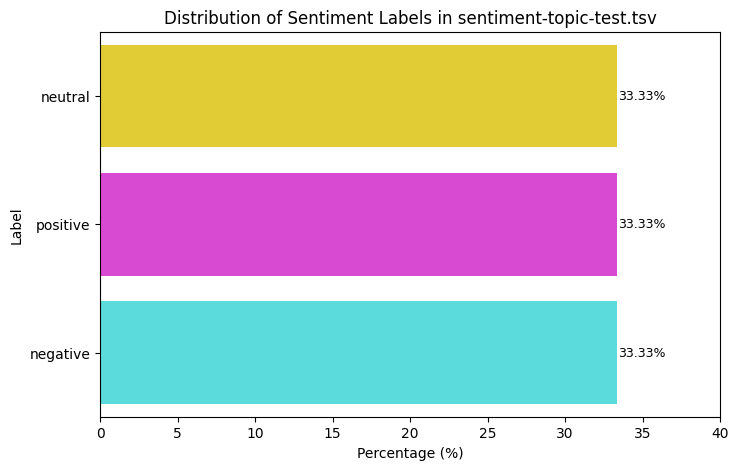

In [12]:
# Distribution of provided Test set (from .tsv file)
file_path = 'Test Data/sentiment-topic-test.tsv'
df = pd.read_csv(file_path, delimiter='\t')

sentiment_counts = Counter(df['sentiment'])

total_labels = sum(sentiment_counts.values())
sentiment_percentages = {label: (count / total_labels) * 100 for label, count in sentiment_counts.items()}

ordered_labels = ["neutral", "positive", "negative"]
percentages = [sentiment_percentages[label] for label in ordered_labels]
color_map = {"neutral": "#FFE119", "positive": "#F032E6", "negative": "#46F0F0"}
colors = [color_map[label] for label in ordered_labels]

# Create the bar chart (horizontal)
plt.figure(figsize=(8,5))
sns.barplot(y=ordered_labels, x=percentages, hue=ordered_labels, palette=colors, legend=False)
for index, value in enumerate(percentages):
    plt.text(value + 0.1, index, f'{value:.2f}%', va='center', fontsize=9)
plt.xlabel('Percentage (%)')
plt.ylabel('Label')
plt.xlim(0, 40) 
filename = os.path.basename(file_path) 
plt.title(f'Distribution of Sentiment Labels in {filename}')
plt.show()

### Feature Engineering

### Model Training

# 3. Topic Classification

### Training & Validation Sets

#### Distribution Analysis

In [13]:
def visualize_topic_distribution(file_path):
    '''
        TBA
    '''
    df = pd.read_csv(file_path)

    topic_counts = Counter(df['label'])

    total_labels = sum(topic_counts.values())
    topic_percentages = {label: (count / total_labels) * 100 for label, count in topic_counts.items()}
    
    ordered_labels = ["sports", "movie", "book"]
    percentages = [topic_percentages[label] for label in ordered_labels]
    color_map = {"sports": "#0082C8", "movie": "#3CB44B", "book": "#E6194B"}
    colors = [color_map[label] for label in ordered_labels]

    # Create the bar chart (horizontal)
    plt.figure(figsize=(8, 5))
    sns.barplot(y=ordered_labels, x=percentages, hue=ordered_labels, palette=colors, legend=False)
    for index, value in enumerate(percentages):
        plt.text(value + 0.2, index, f'{value:.2f}%', va='center', fontsize=9)
    plt.xlabel('Percentage (%)')
    plt.ylabel('Label')
    plt.xlim(0, 45) 
    filename = os.path.basename(file_path) 
    plt.title(f'Distribution of Topic Labels in {filename}')
    plt.show()

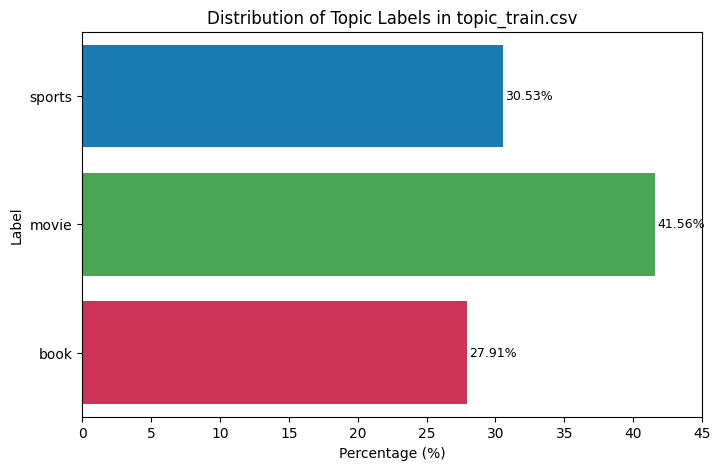

In [14]:
# This dataset did not come split; therefore, plot the whole thing here, and we can call the vis function for each split after, if we want to plot each part
files = ['Training Data/Topic Classification Data/topic_train.csv']

for file in files:
    visualize_topic_distribution(file)

### Training & Validation Sets

In [15]:
# perhaps filter reviews that are one-word like 'good', 'great' 
# format the reviews text the same way, some of them are within '', others are not, make all without ''
# make graphs of data distribution

### Test Set (the same test set is used for both sentiment analysis and topic modeling)

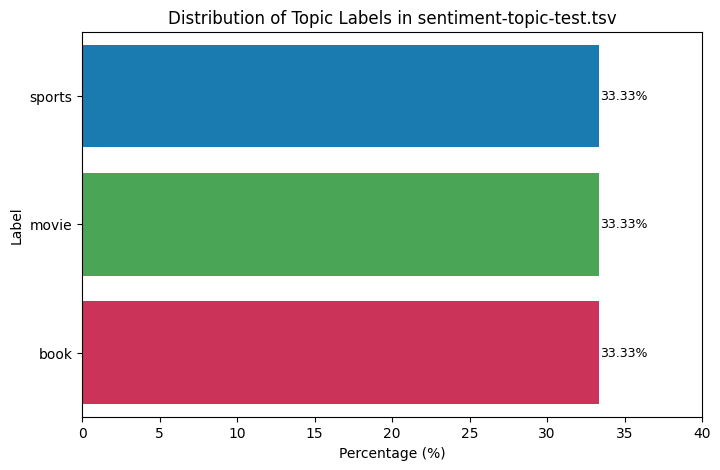

In [16]:
# Distribution of provided Test set (from .tsv file)
file_path = 'Test Data/sentiment-topic-test.tsv'
df = pd.read_csv(file_path, delimiter='\t')

topic_counts = Counter(df['topic'])

total_labels = sum(topic_counts.values())
topic_percentages = {label: (count / total_labels) * 100 for label, count in topic_counts.items()}

ordered_labels = ["sports", "movie", "book"]
percentages = [topic_percentages[label] for label in ordered_labels]
color_map = {"sports": "#0082C8", "movie": "#3CB44B", "book": "#E6194B"}
colors = [color_map[label] for label in ordered_labels]

# Create the bar chart (horizontal)
plt.figure(figsize=(8, 5))
sns.barplot(y=ordered_labels, x=percentages, hue=ordered_labels, palette=colors, legend=False)
for index, value in enumerate(percentages):
    plt.text(value + 0.1, index, f'{value:.2f}%', va='center', fontsize=9)
plt.xlabel('Percentage (%)')
plt.ylabel('Label')
plt.xlim(0, 40) 
filename = os.path.basename(file_path) 
plt.title(f'Distribution of Topic Labels in {filename}')
plt.show()

### Feature Engineering

### Model Training